<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/3_Big_Data_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spark  SQL**



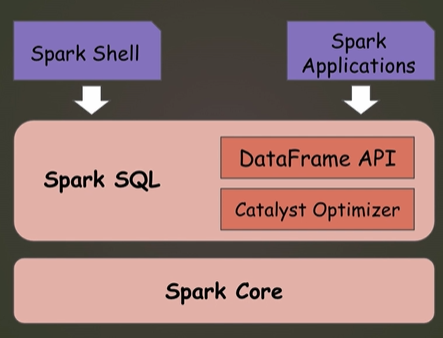

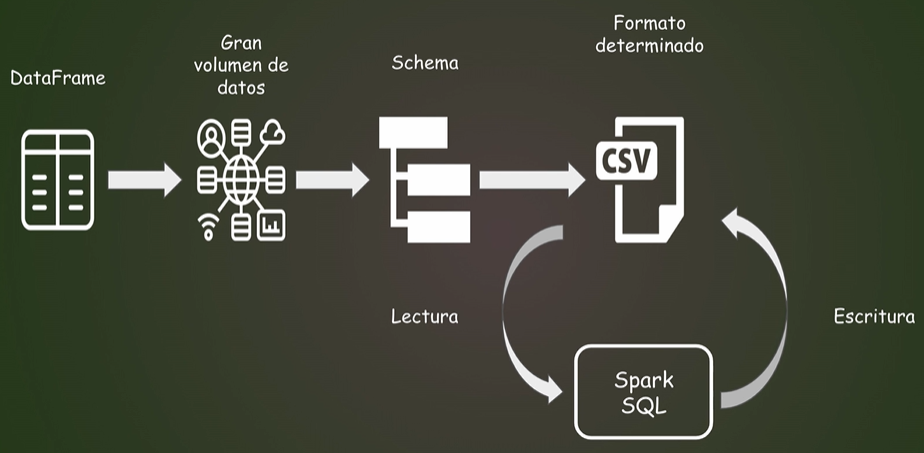

# Creando DataFrames

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [ ]:
rdd = sc.parallelize([item for item in range(10)]).map(lambda x: (x, x ** 2))

In [ ]:
rdd.collect()


[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

In [ ]:
# crear un dataframe a partir de un rdd
df = rdd.toDF(['numero', 'cudrado'])

In [ ]:
# PODEMOS VER EL SCHEMA
df.printSchema()

root
 |-- numero: long (nullable = true)
 |-- cudrado: long (nullable = true)



In [ ]:

df.show()

+------+-------+
|numero|cudrado|
+------+-------+
|     0|      0|
|     1|      1|
|     2|      4|
|     3|      9|
|     4|     16|
|     5|     25|
|     6|     36|
|     7|     49|
|     8|     64|
|     9|     81|
+------+-------+



In [ ]:
# Crear un DataFrame a partir de un RDD con schema

rdd1 = sc.parallelize([(1, 'Jose', 35.5), (2, 'Teresa', 54.3), (3, 'Katia', 12.7)])

In [ ]:
#importar librerias
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

In [ ]:
# Primera vía

esquema1 = StructType(
    [
     StructField('id', IntegerType(), True),
     StructField('nombre', StringType(), True),
     StructField('saldo', DoubleType(), True)
    ]
)

In [ ]:
# Segunda vía

esquema2 = "`id` INT, `nombre` STRING, `saldo` DOUBLE"

In [ ]:
df1 = spark.createDataFrame(rdd1, schema=esquema1)

In [ ]:
df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- saldo: double (nullable = true)



In [ ]:

df1.show()

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



In [ ]:
df2 = spark.createDataFrame(rdd1, schema=esquema2)

In [ ]:

df2.printSchema()

df2.show()


root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- saldo: double (nullable = true)

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



In [ ]:

# Crear un DataFrame a partir de un rango de números

spark.range(5).toDF('id').show()

spark.range(3, 15).toDF('id').show()

spark.range(0, 20, 2).toDF('id').show()

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+

+---+
| id|
+---+
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
+---+

+---+
| id|
+---+
|  0|
|  2|
|  4|
|  6|
|  8|
| 10|
| 12|
| 14|
| 16|
| 18|
+---+



# Crear DataFrames a partir de fuentes de datos en la práctica

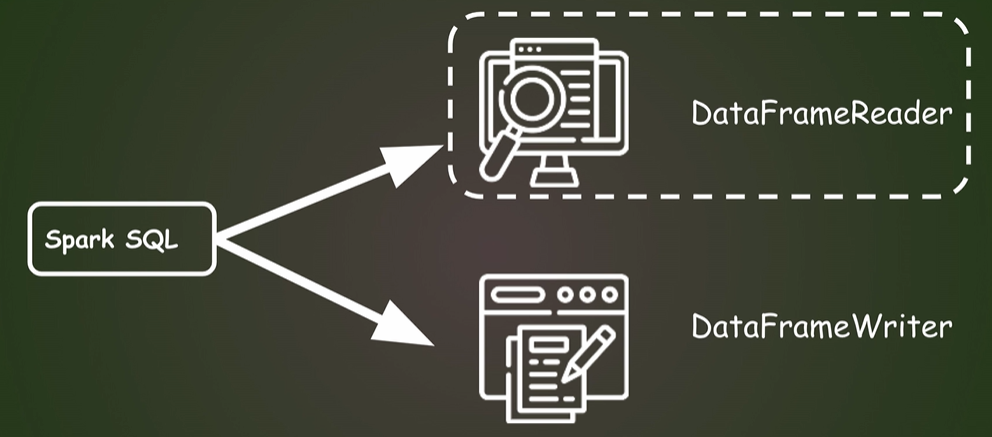

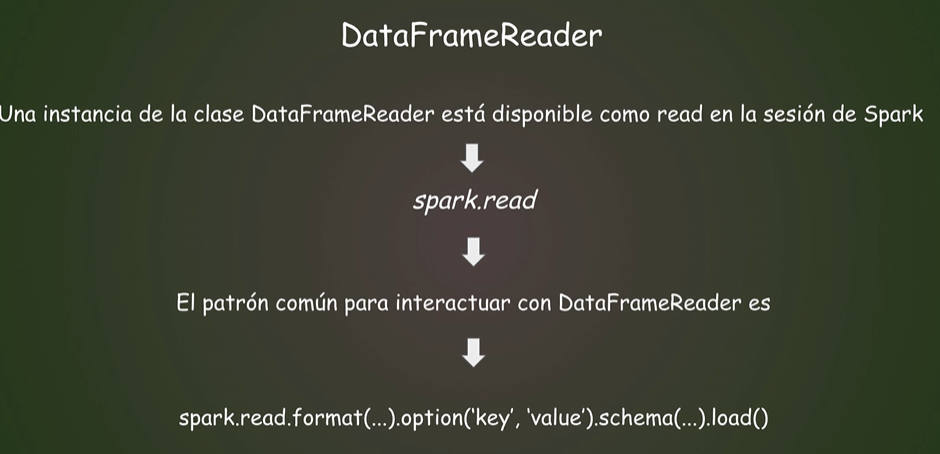

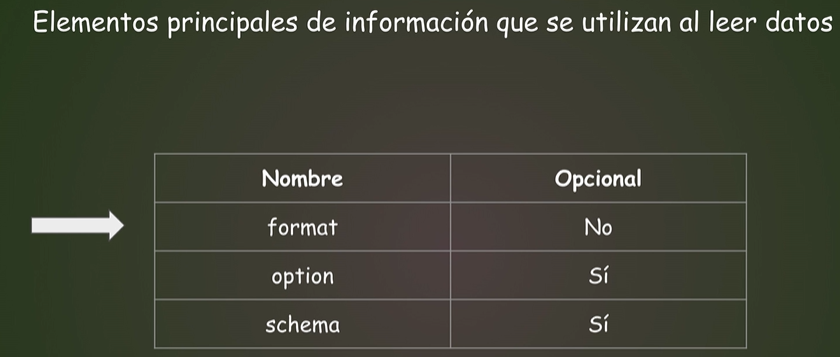

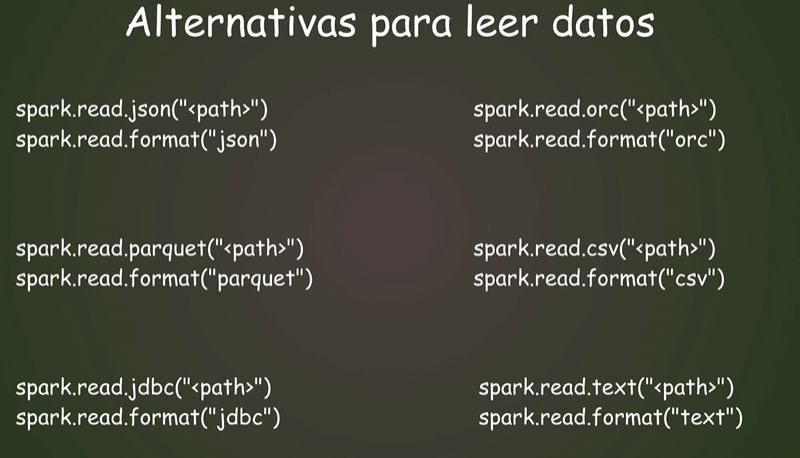

In [ ]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [145]:

# Crear un DataFrame mediante la lectura de un archivo de texto

df = spark.read.text('./data/dataTXT.txt')

In [146]:
df.show()

+--------------------+
|               value|
+--------------------+
|Estamos en el cur...|
|En este capítulo ...|
|En esta sección e...|
|y en este ejemplo...|
+--------------------+



In [147]:

df.show(truncate=False)

+-----------------------------------------------------------------------+
|value                                                                  |
+-----------------------------------------------------------------------+
|Estamos en el curso de pyspark                                         |
|En este capítulo estamos estudiando el API SQL de Saprk                |
|En esta sección estamos creado dataframes a partir de fuentes de datos,|
|y en este ejemplo creamos un dataframe a partir de un texto plano      |
+-----------------------------------------------------------------------+



In [157]:
gastocontarjeta =spark.read.text("/content/data2.txt")
gastocontarjeta.show(truncate=False)

+---------------------------------------+
|value                                  |
+---------------------------------------+
|Entrada\tSalida                        |
|Alice;Tarjeta de credito;100\tAlice;250|
|Alice;Tarjeta de credito;150\tBob;201  |
|Alice;Bizum;200\tLuis;0                |
|Bob;Tarjeta de credito;201\t           |
|Luis;Bizum;300                         |
+---------------------------------------+



In [148]:

# Crear un DataFrame mediante la lectura de un archivo csv

df1 = spark.read.csv('./data/dataCSV.csv')

df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+--------------------+
|        _c0|          _c1|                 _c2|                 _c3|        _c4|                 _c5|                 _c6|    _c7|   _c8|     _c9|         _c10|                _c11|             _c12|            _c13|                _c14|                _c15|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|vid

In [149]:
df1 = spark.read.option('header', 'true').csv('./data/dataCSV.csv')

df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [150]:
# Leer un archivo de texto con un delimitador diferente

df2 = spark.read.option('header', 'true').option('delimiter', '|').csv('./data/dataTab.txt')

df2.show()

+----+----+----------+-----+
|pais|edad|     fecha|color|
+----+----+----------+-----+
|  MX|  23|2021-02-21| rojo|
|  CA|  56|2021-06-10| azul|
|  US|  32|2020-06-02|verde|
+----+----+----------+-----+



In [151]:
# Crear un DataFrame a partir de un json proporcionando un schema

from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType

json_schema =  StructType(
    [
     StructField('color', StringType(), True),
     StructField('edad', IntegerType(), True),
     StructField('fecha', DateType(), True),
     StructField('pais', StringType(), True)
    ]
)


In [152]:

df4 = spark.read.schema(json_schema).json('./data/dataJSON.json')

df4.show()

+-----+----+----------+----+
|color|edad|     fecha|pais|
+-----+----+----------+----+
| rojo|null|2021-02-21|  MX|
| azul|null|2021-06-10|  CA|
|verde|null|2020-06-02|  US|
+-----+----+----------+----+



In [153]:
df4.printSchema()

root
 |-- color: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- fecha: date (nullable = true)
 |-- pais: string (nullable = true)



In [154]:
# Crear un DataFrame a partir de un archivo parquet
df5 = spark.read.parquet('./data/dataPARQUET.parquet')
df5.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [155]:
# Otra alternativa para leer desde una fuente de datos parquet en este caso

df6 = spark.read.format('parquet').load('./data/dataPARQUET.parquet')

df6.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



# Trabajo con columnas

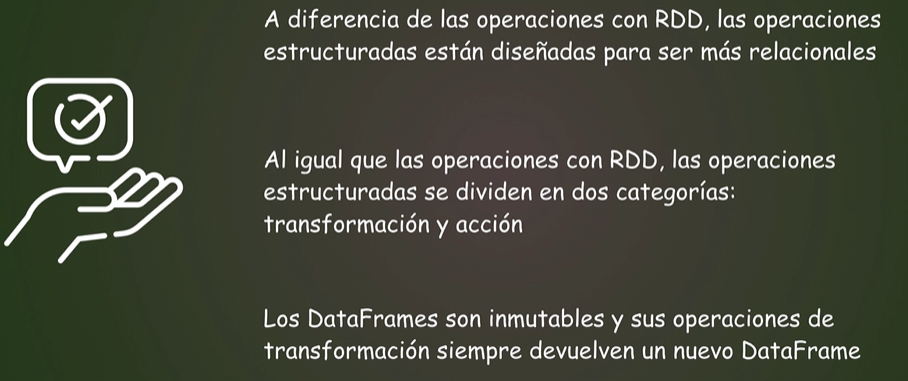

In [159]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [160]:
df = spark.read.parquet('./data/dataPARQUET.parquet')

df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [161]:

# Primera alternativa para referirnos a las columnas

df.select('title').show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



In [162]:
# Segunda alternativa

from pyspark.sql.functions import col

df.select(col('title')).show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



# Transformaciones - funciones select y selectExpr

In [163]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [174]:

# select
df = spark.read.parquet('./data/datos.parquet')

In [176]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [167]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [168]:
from pyspark.sql.functions import col

df.select(col('video_id')).show()

+-----------+
|   video_id|
+-----------+
|2kyS6SvSYSE|
|1ZAPwfrtAFY|
|5qpjK5DgCt4|
|puqaWrEC7tY|
|d380meD0W0M|
|gHZ1Qz0KiKM|
|39idVpFF7NQ|
|nc99ccSXST0|
|jr9QtXwC9vc|
|TUmyygCMMGA|
|9wRQljFNDW8|
|VifQlJit6A0|
|5E4ZBSInqUU|
|GgVmn66oK_A|
|TaTleo4cOs8|
|kgaO45SyaO4|
|ZAQs-ctOqXQ|
|YVfyYrEmzgM|
|eNSN6qet1kE|
|B5HORANmzHw|
+-----------+
only showing top 20 rows



In [169]:
df.select('video_id', 'trending_date').show()

+-----------+-------------+
|   video_id|trending_date|
+-----------+-------------+
|2kyS6SvSYSE|     17.14.11|
|1ZAPwfrtAFY|     17.14.11|
|5qpjK5DgCt4|     17.14.11|
|puqaWrEC7tY|     17.14.11|
|d380meD0W0M|     17.14.11|
|gHZ1Qz0KiKM|     17.14.11|
|39idVpFF7NQ|     17.14.11|
|nc99ccSXST0|     17.14.11|
|jr9QtXwC9vc|     17.14.11|
|TUmyygCMMGA|     17.14.11|
|9wRQljFNDW8|     17.14.11|
|VifQlJit6A0|     17.14.11|
|5E4ZBSInqUU|     17.14.11|
|GgVmn66oK_A|     17.14.11|
|TaTleo4cOs8|     17.14.11|
|kgaO45SyaO4|     17.14.11|
|ZAQs-ctOqXQ|     17.14.11|
|YVfyYrEmzgM|     17.14.11|
|eNSN6qet1kE|     17.14.11|
|B5HORANmzHw|     17.14.11|
+-----------+-------------+
only showing top 20 rows



In [170]:
# Esta vía nos dará error

df.select(
    'likes',
    'dislikes',
    ('likes' - 'dislikes')
).show()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [171]:

# Forma correcta

df.select(
    col('likes'),
    col('dislikes'),
    (col('likes') - col('dislikes')).alias('aceptacion')
).show()

+------+--------+----------+
| likes|dislikes|aceptacion|
+------+--------+----------+
| 57527|    2966|     54561|
| 97185|    6146|     91039|
|146033|    5339|    140694|
| 10172|     666|      9506|
|132235|    1989|    130246|
|  9763|     511|      9252|
| 15993|    2445|     13548|
| 23663|     778|     22885|
|  3543|     119|      3424|
| 12654|    1363|     11291|
|   655|      25|       630|
|  1576|     303|      1273|
|114188|    1333|    112855|
|  7848|    1171|      6677|
|  7473|     246|      7227|
|  9419|      52|      9367|
|  8011|     638|      7373|
|  5398|      53|      5345|
| 11963|      36|     11927|
|  8421|     191|      8230|
+------+--------+----------+
only showing top 20 rows



In [172]:
# selectExpr

df.selectExpr('likes', 'dislikes', '(likes - dislikes) as aceptacion').show()


+------+--------+----------+
| likes|dislikes|aceptacion|
+------+--------+----------+
| 57527|    2966|     54561|
| 97185|    6146|     91039|
|146033|    5339|    140694|
| 10172|     666|      9506|
|132235|    1989|    130246|
|  9763|     511|      9252|
| 15993|    2445|     13548|
| 23663|     778|     22885|
|  3543|     119|      3424|
| 12654|    1363|     11291|
|   655|      25|       630|
|  1576|     303|      1273|
|114188|    1333|    112855|
|  7848|    1171|      6677|
|  7473|     246|      7227|
|  9419|      52|      9367|
|  8011|     638|      7373|
|  5398|      53|      5345|
| 11963|      36|     11927|
|  8421|     191|      8230|
+------+--------+----------+
only showing top 20 rows



In [173]:

df.selectExpr("count(distinct(video_id)) as videos").show()

+------+
|videos|
+------+
|  6837|
+------+



# Transformaciones - funciones filter y where

In [177]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# leyendo los datos

In [178]:

df = spark.read.parquet('./data/datos.parquet')

In [179]:
# filter

from pyspark.sql.functions import col

df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [180]:

df.filter(col('video_id') == '2kyS6SvSYSE').show()

+-----------+-------------+--------------------+-------------+-----------+-------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|channel_title|category_id|       publish_time|           tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------+-----------+-------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...| CaseyNeistat|         22|2017-11-13 17:13:01|SHANtell martin| 748374|57527|    2966|        15954|https://i.ytimg.c...|            False|           False|                 False|SHANTELL'S CHANNE...|
|2kyS6Sv

In [183]:
df1 = spark.read.parquet('./data/datos.parquet').where(col('trending_date') != '17.14.11')
df1.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|            video_id|       trending_date|               title|       channel_title|         category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|\nCook with confi...|             recipes|              videos| and restaurant g...| dining destinations|               null|                

In [184]:

df2 = spark.read.parquet('./data/datos.parquet').where(col('likes') > 5000)

In [185]:

df2.filter((col('trending_date') != '17.14.11') & (col('likes') > 7000)).show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14 15:32:51|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           False| 

In [186]:
df2.filter(col('trending_date') != '17.14.11').filter(col('likes') > 7000).show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14 15:32:51|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           False| 

# Transformaciones - funciones distinct y dropDuplicates

In [187]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [199]:
df = spark.read.parquet('./data')

Py4JJavaError: An error occurred while calling o57404.parquet.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 118.0 failed 1 times, most recent failure: Lost task 0.0 in stage 118.0 (TID 150) (7c2cc04d9ca5 executor driver): org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.util.ThreadUtils$.parmap(ThreadUtils.scala:375)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.readParquetFootersInParallel(ParquetFileFormat.scala:481)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1(ParquetFileFormat.scala:527)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1$adapted(ParquetFileFormat.scala:521)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.$anonfun$mergeSchemasInParallel$2(SchemaMergeUtils.scala:76)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: Could not read footer for file: FileStatus{path=file:/content/data/dataCSV.csv; isDirectory=false; length=62756152; replication=0; blocksize=0; modification_time=0; access_time=0; owner=; group=; permission=rw-rw-rw-; isSymlink=false; hasAcl=false; isEncrypted=false; isErasureCoded=false}
	at org.apache.spark.sql.errors.QueryExecutionErrors$.cannotReadFooterForFileError(QueryExecutionErrors.scala:726)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:494)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:372)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1402)
	at java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:289)
	at java.util.concurrent.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1056)
	at java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1692)
	at java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:175)
Caused by: java.lang.RuntimeException: file:/content/data/dataCSV.csv is not a Parquet file. Expected magic number at tail, but found [116, 121, 34, 10]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:556)
	at org.apache.parquet.hadoop.ParquetFileReader.<init>(ParquetFileReader.java:776)
	at org.apache.parquet.hadoop.ParquetFileReader.open(ParquetFileReader.java:657)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:53)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:44)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:488)
	... 13 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2454)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2402)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2402)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1160)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2584)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2573)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2254)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2279)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.mergeSchemasInParallel(SchemaMergeUtils.scala:70)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.mergeSchemasInParallel(ParquetFileFormat.scala:531)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetUtils$.inferSchema(ParquetUtils.scala:107)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.inferSchema(ParquetFileFormat.scala:163)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:210)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:207)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:411)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:274)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:245)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:245)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:596)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.util.ThreadUtils$.parmap(ThreadUtils.scala:375)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.readParquetFootersInParallel(ParquetFileFormat.scala:481)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1(ParquetFileFormat.scala:527)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1$adapted(ParquetFileFormat.scala:521)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.$anonfun$mergeSchemasInParallel$2(SchemaMergeUtils.scala:76)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: Could not read footer for file: FileStatus{path=file:/content/data/dataCSV.csv; isDirectory=false; length=62756152; replication=0; blocksize=0; modification_time=0; access_time=0; owner=; group=; permission=rw-rw-rw-; isSymlink=false; hasAcl=false; isEncrypted=false; isErasureCoded=false}
	at org.apache.spark.sql.errors.QueryExecutionErrors$.cannotReadFooterForFileError(QueryExecutionErrors.scala:726)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:494)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:372)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1402)
	at java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:289)
	at java.util.concurrent.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1056)
	at java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1692)
	at java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:175)
Caused by: java.lang.RuntimeException: file:/content/data/dataCSV.csv is not a Parquet file. Expected magic number at tail, but found [116, 121, 34, 10]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:556)
	at org.apache.parquet.hadoop.ParquetFileReader.<init>(ParquetFileReader.java:776)
	at org.apache.parquet.hadoop.ParquetFileReader.open(ParquetFileReader.java:657)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:53)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:44)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:488)
	... 13 more


In [191]:
# distinct

df_sin_duplicados = df.distinct()

In [192]:

print('El conteo del dataframe original es {}'.format(df.count()))

El conteo del dataframe original es 48137


In [193]:
print('El conteo del dataframe sin duplicados es {}'.format(df_sin_duplicados.count()))

El conteo del dataframe sin duplicados es 41428


In [194]:

# función dropDuplicates

dataframe = spark.createDataFrame([(1, 'azul', 567), (2, 'rojo', 487), (1, 'azul', 345), (2, 'verde', 783)]).toDF('id', 'color', 'importe')

dataframe.show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  1| azul|    345|
|  2|verde|    783|
+---+-----+-------+



In [195]:
dataframe.dropDuplicates(['id', 'color']).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  2|verde|    783|
+---+-----+-------+



# Transformaciones - funciones sort y orderBy

In [197]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [202]:

from pyspark.sql.functions import col

df = (spark.read.parquet('./data')
    .select(col('likes'), col('views'), col('video_id'), col('dislikes'))
    .dropDuplicates(['video_id'])
)

Py4JJavaError: An error occurred while calling o58714.parquet.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 121.0 failed 1 times, most recent failure: Lost task 0.0 in stage 121.0 (TID 153) (7c2cc04d9ca5 executor driver): org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.util.ThreadUtils$.parmap(ThreadUtils.scala:375)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.readParquetFootersInParallel(ParquetFileFormat.scala:481)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1(ParquetFileFormat.scala:527)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1$adapted(ParquetFileFormat.scala:521)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.$anonfun$mergeSchemasInParallel$2(SchemaMergeUtils.scala:76)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: Could not read footer for file: FileStatus{path=file:/content/data/dataCSV.csv; isDirectory=false; length=62756152; replication=0; blocksize=0; modification_time=0; access_time=0; owner=; group=; permission=rw-rw-rw-; isSymlink=false; hasAcl=false; isEncrypted=false; isErasureCoded=false}
	at org.apache.spark.sql.errors.QueryExecutionErrors$.cannotReadFooterForFileError(QueryExecutionErrors.scala:726)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:494)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:372)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1402)
	at java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:289)
	at java.util.concurrent.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1056)
	at java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1692)
	at java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:175)
Caused by: java.lang.RuntimeException: file:/content/data/dataCSV.csv is not a Parquet file. Expected magic number at tail, but found [116, 121, 34, 10]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:556)
	at org.apache.parquet.hadoop.ParquetFileReader.<init>(ParquetFileReader.java:776)
	at org.apache.parquet.hadoop.ParquetFileReader.open(ParquetFileReader.java:657)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:53)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:44)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:488)
	... 13 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2454)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2402)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2402)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1160)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2584)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2573)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2254)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2279)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.mergeSchemasInParallel(SchemaMergeUtils.scala:70)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.mergeSchemasInParallel(ParquetFileFormat.scala:531)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetUtils$.inferSchema(ParquetUtils.scala:107)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.inferSchema(ParquetFileFormat.scala:163)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:210)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:207)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:411)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:274)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:245)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:245)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:596)
	at sun.reflect.GeneratedMethodAccessor138.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.util.ThreadUtils$.parmap(ThreadUtils.scala:375)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.readParquetFootersInParallel(ParquetFileFormat.scala:481)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1(ParquetFileFormat.scala:527)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1$adapted(ParquetFileFormat.scala:521)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.$anonfun$mergeSchemasInParallel$2(SchemaMergeUtils.scala:76)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: Could not read footer for file: FileStatus{path=file:/content/data/dataCSV.csv; isDirectory=false; length=62756152; replication=0; blocksize=0; modification_time=0; access_time=0; owner=; group=; permission=rw-rw-rw-; isSymlink=false; hasAcl=false; isEncrypted=false; isErasureCoded=false}
	at org.apache.spark.sql.errors.QueryExecutionErrors$.cannotReadFooterForFileError(QueryExecutionErrors.scala:726)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:494)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:372)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1402)
	at java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:289)
	at java.util.concurrent.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1056)
	at java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1692)
	at java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:175)
Caused by: java.lang.RuntimeException: file:/content/data/dataCSV.csv is not a Parquet file. Expected magic number at tail, but found [116, 121, 34, 10]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:556)
	at org.apache.parquet.hadoop.ParquetFileReader.<init>(ParquetFileReader.java:776)
	at org.apache.parquet.hadoop.ParquetFileReader.open(ParquetFileReader.java:657)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:53)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:44)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:488)
	... 13 more


In [203]:

df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [204]:
# sort

df.sort('likes').show()
from pyspark.sql.functions import desc
df.sort(desc('likes')).show()

+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|            video_id|trending_date|  title|       channel_title|         category_id|publish_time|tags|views|likes|dislikes|comment_count|thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|description|
+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|\nGet More Access...|         null|   null|                null|                null|        null|null| null| null|    null|         null|          null|             null|            null|                  null|       null|
|                  \n|         null|   null|                null|                null|        null|n

In [205]:
# función orderBy

df.orderBy(col('views')).show()

df.orderBy(col('views').desc()).show()

dataframe = spark.createDataFrame([(1, 'azul', 568), (2, 'rojo', 235), (1, 'azul', 456), (2, 'azul', 783)]).toDF('id', 'color', 'importe')

dataframe.show()

+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|            video_id|trending_date|  title|       channel_title|         category_id|publish_time|tags|views|likes|dislikes|comment_count|thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|description|
+--------------------+-------------+-------+--------------------+--------------------+------------+----+-----+-----+--------+-------------+--------------+-----------------+----------------+----------------------+-----------+
|                  \n|         null|   null|                null|                null|        null|null| null| null|    null|         null|          null|             null|            null|                  null|       null|
|\nInstagram: http...|         null|   null|                null|                null|        null|n

In [207]:
dataframe.orderBy(col('color').desc(), col('importe')).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  2| rojo|    235|
|  1| azul|    456|
|  1| azul|    568|
|  2| azul|    783|
+---+-----+-------+



In [208]:


# funcion limit

top_10 = df.orderBy(col('views').desc()).limit(10)

top_10.show()

+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|      channel_title|category_id|       publish_time|                tags|    views|  likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+---------+-------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|VYOjWnS4cMY|     18.02.06|Childish Gambino ...|ChildishGambinoVEVO|         10|2018-05-06 04:00:07|"Childish Gambino...|225211923|5023450|  343541|       517232|https://i.ytimg.c...|            False|          

# Transformaciones - funciones withColumn y withColumnRenamed

In [209]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [210]:

df = spark.read.parquet('./data')

Py4JJavaError: An error occurred while calling o65592.parquet.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 135.0 failed 1 times, most recent failure: Lost task 0.0 in stage 135.0 (TID 175) (7c2cc04d9ca5 executor driver): org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.util.ThreadUtils$.parmap(ThreadUtils.scala:375)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.readParquetFootersInParallel(ParquetFileFormat.scala:481)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1(ParquetFileFormat.scala:527)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1$adapted(ParquetFileFormat.scala:521)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.$anonfun$mergeSchemasInParallel$2(SchemaMergeUtils.scala:76)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: Could not read footer for file: FileStatus{path=file:/content/data/dataCSV.csv; isDirectory=false; length=62756152; replication=0; blocksize=0; modification_time=0; access_time=0; owner=; group=; permission=rw-rw-rw-; isSymlink=false; hasAcl=false; isEncrypted=false; isErasureCoded=false}
	at org.apache.spark.sql.errors.QueryExecutionErrors$.cannotReadFooterForFileError(QueryExecutionErrors.scala:726)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:494)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:372)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1402)
	at java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:289)
	at java.util.concurrent.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1056)
	at java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1692)
	at java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:175)
Caused by: java.lang.RuntimeException: file:/content/data/dataCSV.csv is not a Parquet file. Expected magic number at tail, but found [116, 121, 34, 10]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:556)
	at org.apache.parquet.hadoop.ParquetFileReader.<init>(ParquetFileReader.java:776)
	at org.apache.parquet.hadoop.ParquetFileReader.open(ParquetFileReader.java:657)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:53)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:44)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:488)
	... 13 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2454)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2402)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2402)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1160)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2584)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2573)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2254)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2279)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.mergeSchemasInParallel(SchemaMergeUtils.scala:70)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.mergeSchemasInParallel(ParquetFileFormat.scala:531)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetUtils$.inferSchema(ParquetUtils.scala:107)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.inferSchema(ParquetFileFormat.scala:163)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:210)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:207)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:411)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:274)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:245)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:245)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:596)
	at sun.reflect.GeneratedMethodAccessor138.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.util.ThreadUtils$.parmap(ThreadUtils.scala:375)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.readParquetFootersInParallel(ParquetFileFormat.scala:481)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1(ParquetFileFormat.scala:527)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$mergeSchemasInParallel$1$adapted(ParquetFileFormat.scala:521)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.$anonfun$mergeSchemasInParallel$2(SchemaMergeUtils.scala:76)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: Could not read footer for file: FileStatus{path=file:/content/data/dataCSV.csv; isDirectory=false; length=62756152; replication=0; blocksize=0; modification_time=0; access_time=0; owner=; group=; permission=rw-rw-rw-; isSymlink=false; hasAcl=false; isEncrypted=false; isErasureCoded=false}
	at org.apache.spark.sql.errors.QueryExecutionErrors$.cannotReadFooterForFileError(QueryExecutionErrors.scala:726)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:494)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:372)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1402)
	at java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:289)
	at java.util.concurrent.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1056)
	at java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1692)
	at java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:175)
Caused by: java.lang.RuntimeException: file:/content/data/dataCSV.csv is not a Parquet file. Expected magic number at tail, but found [116, 121, 34, 10]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:556)
	at org.apache.parquet.hadoop.ParquetFileReader.<init>(ParquetFileReader.java:776)
	at org.apache.parquet.hadoop.ParquetFileReader.open(ParquetFileReader.java:657)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:53)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFooterReader.readFooter(ParquetFooterReader.java:44)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.$anonfun$readParquetFootersInParallel$1(ParquetFileFormat.scala:488)
	... 13 more


In [213]:

# withColumn

from pyspark.sql.functions import col

df_valoracion = df.withColumn('valoracion', col('likes') - col('dislikes'))

df_valoracion.printSchema()

df_valoracion1 = (df.withColumn('valoracion', col('likes') - col('dislikes'))
                    .withColumn('res_div', col('valoracion') % 10)
)

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- valoracion: integer (nullable = true)



In [214]:
df_valoracion1.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- valoracion: integer (nullable = true)
 |-- res_div: integer (nullable = true)



In [215]:

df_valoracion1.select(col('likes'), col('dislikes'), col('valoracion'), col('res_div')).show()

+------+--------+----------+-------+
| likes|dislikes|valoracion|res_div|
+------+--------+----------+-------+
| 57527|    2966|     54561|      1|
| 97185|    6146|     91039|      9|
|146033|    5339|    140694|      4|
| 10172|     666|      9506|      6|
|132235|    1989|    130246|      6|
|  9763|     511|      9252|      2|
| 15993|    2445|     13548|      8|
| 23663|     778|     22885|      5|
|  3543|     119|      3424|      4|
| 12654|    1363|     11291|      1|
|   655|      25|       630|      0|
|  1576|     303|      1273|      3|
|114188|    1333|    112855|      5|
|  7848|    1171|      6677|      7|
|  7473|     246|      7227|      7|
|  9419|      52|      9367|      7|
|  8011|     638|      7373|      3|
|  5398|      53|      5345|      5|
| 11963|      36|     11927|      7|
|  8421|     191|      8230|      0|
+------+--------+----------+-------+
only showing top 20 rows



In [217]:
# withColumnRenamed

df_renombrado = df.withColumnRenamed('video_id', 'id')

df_renombrado.printSchema()

root
 |-- id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [218]:


df_error = df.withColumnRenamed('nombre_que_no_existe', 'otro_nombre')

df_error.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)

